### Problem 2.1

In [1]:
import networkx as nx
import ndlib.models.epidemics as ep

In [2]:
# Network Definition
#fh = open("C:/Users/Clayton/Downloads/Cayley_tree.txt", "rb")
g = nx.erdos_renyi_graph(1000, 0.1)
#g = nx.read_edgelist(fh)
# Model Selection
#model = ep.SIRModel(g)

In [9]:
import ndlib.models.ModelConfig as mc

# SI
si_model = ep.SIModel(g)
config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter("fraction_infected", 0.05)
#config.add_model_initial_configuration("Infected", ["0"])
si_model.set_initial_status(config)

In [10]:
# Simulation
iterations = si_model.iteration_bunch(200)
trends = si_model.build_trends(iterations)

100%|██████████| 200/200 [00:02<00:00, 67.17it/s]


In [11]:
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(si_model, trends)
p1 = viz.plot(width=400, height=400)
show(p1)

### Problem 2.2

In [12]:
iters = []
# Network Definition
file = open("C:/Users/Clayton/Downloads/Cayley_tree.txt", "rb")
g = nx.read_edgelist(file)

for i in range(0,100):
    # SI
    si_model = ep.SIModel(g)
    config = mc.Configuration()
    config.add_model_parameter('beta', 0.2)
    config.add_model_initial_configuration("Infected", ["0"])
    
    si_model.set_initial_status(config)
    iterations = si_model.iteration_bunch(10)
    trends = si_model.build_trends(iterations)
    
    iters.append(iterations)

infecteds = {}    
final_infecteds = []    
for j in iters:
    infecteds = {'0':1}
    for itr in j:
        #print(itr)
        #print(itr['status'])
        for key in itr['status'].keys():
            if itr['iteration'] != 0:
                infecteds[key] = itr['status'][key]
    #print(infecteds)
    final_infecteds.append(infecteds)
    #print()

print(final_infecteds)

100%|██████████| 10/10 [00:00<00:00, 1952.02it/s]


[{'0': 1, '3': 1, '8': 1, '1': 1, '2': 1, '4': 1, '6': 1, '5': 1, '10': 1, '18': 1}, {'0': 1, '1': 1, '3': 1, '4': 1, '8': 1, '11': 1, '19': 1, '2': 1, '9': 1, '10': 1, '18': 1}, {'0': 1, '3': 1, '2': 1, '1': 1, '6': 1, '14': 1, '4': 1, '9': 1, '7': 1, '11': 1}, {'0': 1, '1': 1, '3': 1, '8': 1, '2': 1, '5': 1, '4': 1}, {'0': 1, '1': 1, '4': 1, '2': 1, '5': 1}, {'0': 1, '1': 1, '3': 1, '9': 1, '20': 1, '21': 1}, {'0': 1, '2': 1, '3': 1, '1': 1, '6': 1, '9': 1, '4': 1, '5': 1, '20': 1, '8': 1, '14': 1, '7': 1, '13': 1, '19': 1, '10': 1, '15': 1, '18': 1, '21': 1, '11': 1}, {'0': 1, '1': 1, '4': 1, '2': 1, '5': 1, '11': 1, '3': 1, '7': 1, '13': 1, '10': 1}, {'0': 1, '1': 1, '2': 1, '7': 1, '3': 1, '5': 1, '6': 1, '9': 1, '17': 1}, {'0': 1, '2': 1, '6': 1, '14': 1, '15': 1, '7': 1}, {'0': 1, '1': 1, '3': 1, '2': 1, '5': 1, '8': 1, '6': 1, '9': 1, '7': 1, '12': 1, '19': 1, '14': 1, '15': 1}, {'0': 1, '3': 1, '2': 1, '7': 1, '6': 1, '9': 1, '14': 1, '16': 1, '20': 1}, {'0': 1, '2': 1, '1': 1

### Problem 2.3

In [13]:
accuracy = [0,0]
for S_i in final_infecteds:
    H = g.subgraph(S_i.keys())
    print(nx.center(H))
    if '0' in nx.center(H):
        accuracy[0] +=1
    accuracy[1] += 1

accuracy_of_center_estimator = accuracy[0]/accuracy[1]   
print(accuracy_of_center_estimator)

['0']
['0']
['0']
['0']
['1', '0']
['3']
['0']
['1', '0']
['2', '0']
['2', '6']
['0']
['0']
['2', '0']
['0']
['0']
['0']
['2', '0']
['1', '0']
['0']
['0']
['3']
['0']
['0']
['3']
['0']
['0']
['0']
['1']
['0']
['0']
['0']
['0']
['3', '0']
['0']
['3']
['0']
['1']
['0']
['0']
['2', '0']
['3', '0']
['3', '0']
['2', '0']
['0']
['0']
['0']
['0']
['2']
['3']
['0']
['0']
['0', '2']
['1', '5']
['0']
['0']
['0']
['2']
['0']
['0']
['0']
['1', '0']
['0']
['0']
['1', '5']
['0']
['2', '0']
['0']
['0', '2']
['0']
['1', '5']
['0', '3']
['0']
['0']
['0']
['1', '0']
['0']
['3', '0']
['0']
['0']
['0']
['0']
['0']
['3', '0']
['3', '0']
['0']
['0']
['0']
['0']
['0']
['3', '0']
['0']
['0']
['1', '0']
['0']
['0']
['1']
['0']
['0']
['2', '0']
['0']
0.86


### Problem 2.4

In [14]:
## I'm going to set M = 3 because there is nothing in the problem to suggest which to use...
iters = []
# Network Definition
file = open("C:/Users/Clayton/Downloads/Cayley_tree.txt", "rb")
g = nx.read_edgelist(file)

for i in range(0,100):
    # SI
    si_model = ep.SIModel(g)
    config = mc.Configuration()
    config.add_model_parameter('beta', 0.2)
    config.add_model_initial_configuration("Infected", ["3"])
    
    si_model.set_initial_status(config)
    iterations = si_model.iteration_bunch(10)
    trends = si_model.build_trends(iterations)
    
    iters.append(iterations)

infecteds = {}    
final_infecteds = []    
for j in iters:
    infecteds = {'3':1}
    for itr in j:
        #print(itr)
        #print(itr['status'])
        for key in itr['status'].keys():
            if itr['iteration'] != 0:
                infecteds[key] = itr['status'][key]
    #print(infecteds)
    final_infecteds.append(infecteds)
    #print()

print(final_infecteds)

accuracy = [0,0]
for S_i in final_infecteds:
    H = g.subgraph(S_i.keys())
    #print(nx.center(H))
    if '3' in nx.center(H):
        accuracy[0] +=1
    accuracy[1] += 1

accuracy_of_center_estimator = accuracy[0]/accuracy[1]   
print(accuracy_of_center_estimator)

100%|██████████| 10/10 [00:00<00:00, 2228.17it/s]


[{'3': 1, '8': 1, '18': 1, '0': 1, '1': 1, '2': 1, '5': 1, '13': 1}, {'3': 1, '8': 1, '9': 1, '18': 1, '19': 1, '21': 1}, {'3': 1, '8': 1, '18': 1, '19': 1}, {'3': 1, '8': 1, '9': 1, '20': 1, '21': 1, '18': 1, '19': 1}, {'3': 1, '8': 1, '19': 1, '18': 1}, {'3': 1, '9': 1, '0': 1, '1': 1, '5': 1, '8': 1, '20': 1, '2': 1, '12': 1, '21': 1, '6': 1, '18': 1, '19': 1}, {'3': 1, '8': 1, '18': 1, '9': 1, '21': 1, '0': 1, '20': 1}, {'3': 1, '9': 1, '0': 1, '1': 1, '2': 1, '4': 1, '21': 1, '5': 1, '7': 1, '8': 1, '19': 1, '20': 1, '10': 1}, {'3': 1, '0': 1, '9': 1, '8': 1, '1': 1, '2': 1, '18': 1, '21': 1, '5': 1, '6': 1, '4': 1, '7': 1}, {'3': 1, '0': 1, '8': 1, '2': 1, '18': 1, '6': 1, '14': 1}, {'3': 1, '9': 1, '0': 1, '8': 1, '21': 1, '1': 1, '2': 1, '6': 1, '20': 1, '7': 1, '15': 1, '4': 1, '14': 1, '5': 1}, {'3': 1, '0': 1, '8': 1, '9': 1, '18': 1}, {'3': 1, '0': 1, '2': 1, '9': 1, '1': 1, '20': 1, '5': 1, '21': 1}, {'3': 1, '8': 1, '9': 1, '18': 1, '0': 1, '19': 1, '20': 1, '21': 1}, {'3

### Problem 2.5

###### this is done in the the Overleaf

### Problem 3.1

In [22]:
plt.close()

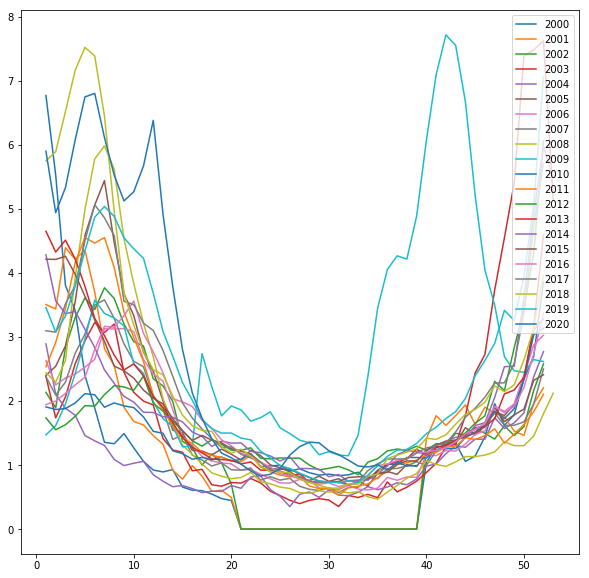

In [20]:
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Clayton/Downloads/ILINet.csv')

national_data = df.loc[df['REGION'] == 'National']

years = df.YEAR.unique()

line_dict = {}
for year in years:
    year_data = national_data.loc[national_data["YEAR"] == year]
    weighted_ili = year_data['% WEIGHTED ILI'].tolist()
    week = year_data["WEEK"].tolist()
    line_dict[year] = [week,weighted_ili]
    
for year in line_dict:
    x = line_dict[year][0]
    y = line_dict[year][1]
    plt.plot(x,y, label = year)
    
plt.rcParams["figure.figsize"] = (10,10)
plt.legend(loc = "upper right")
plt.show()

### Problem 3.2

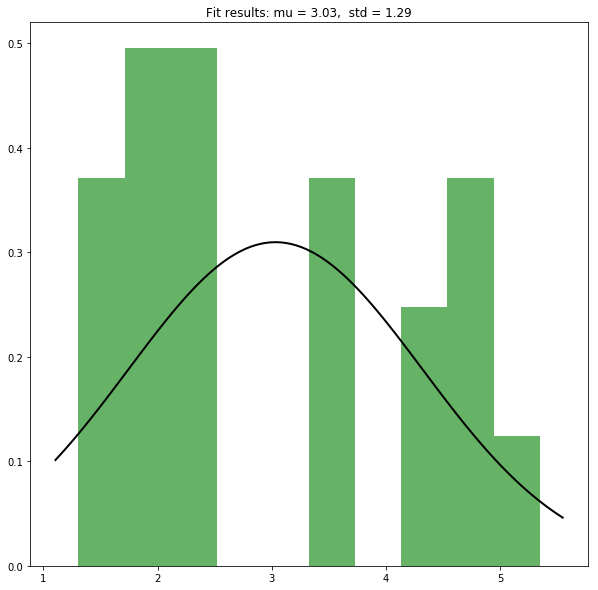

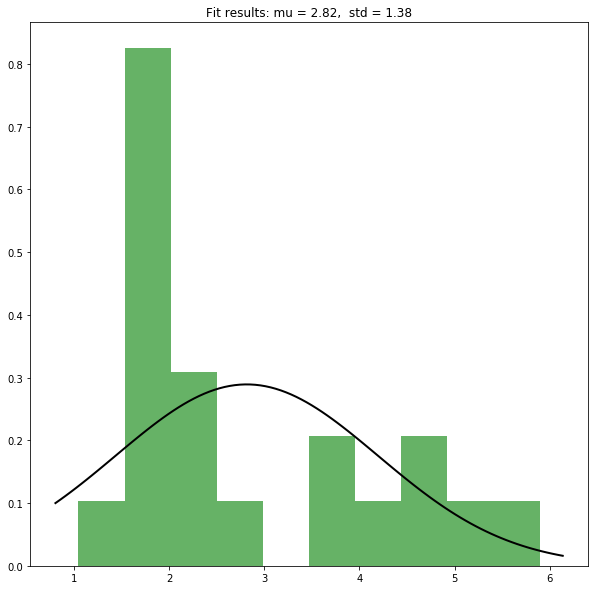

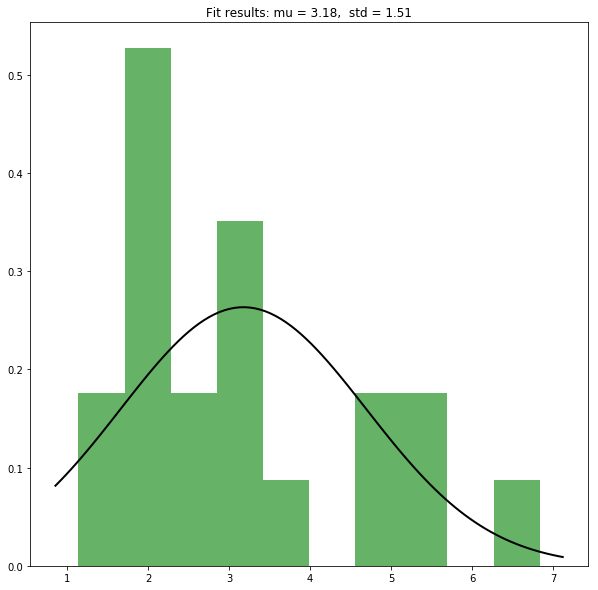

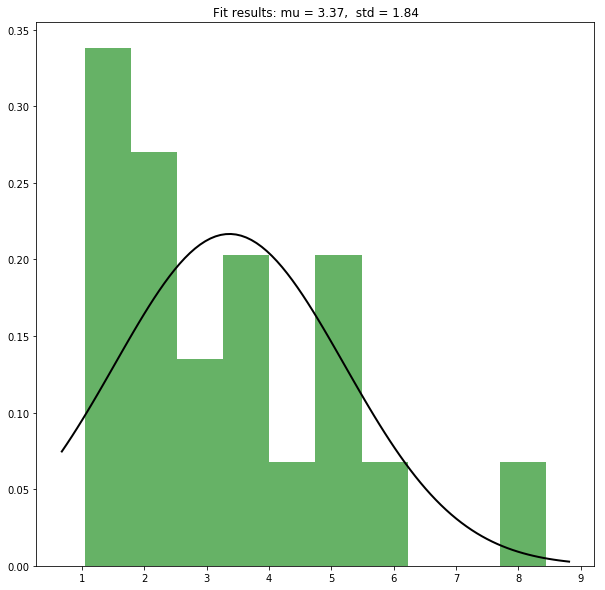

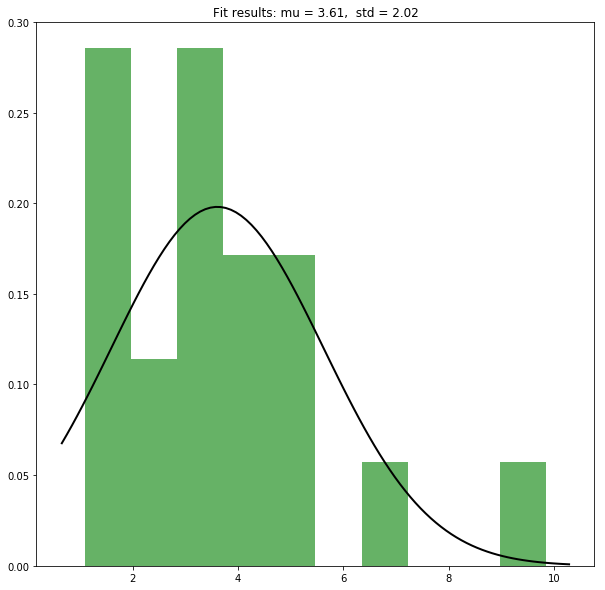

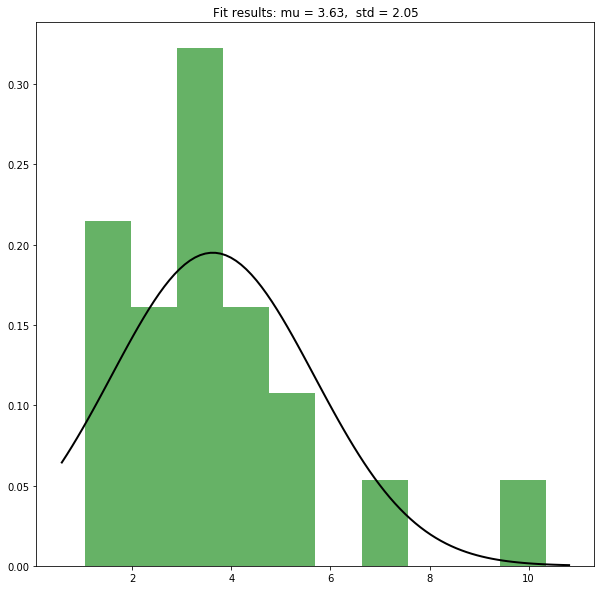

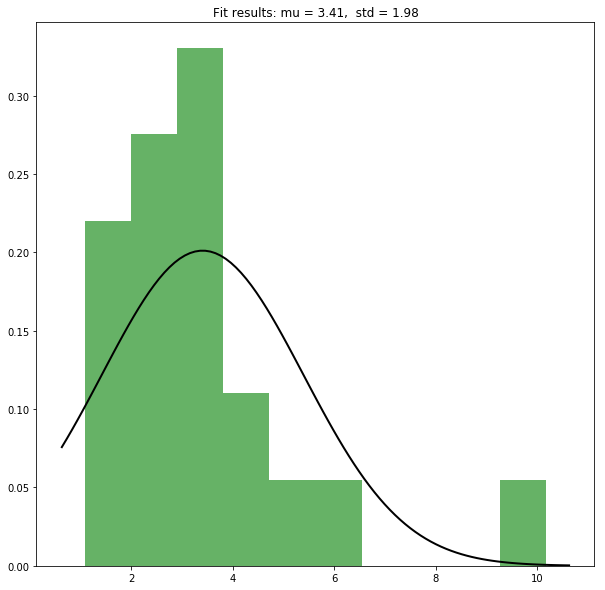

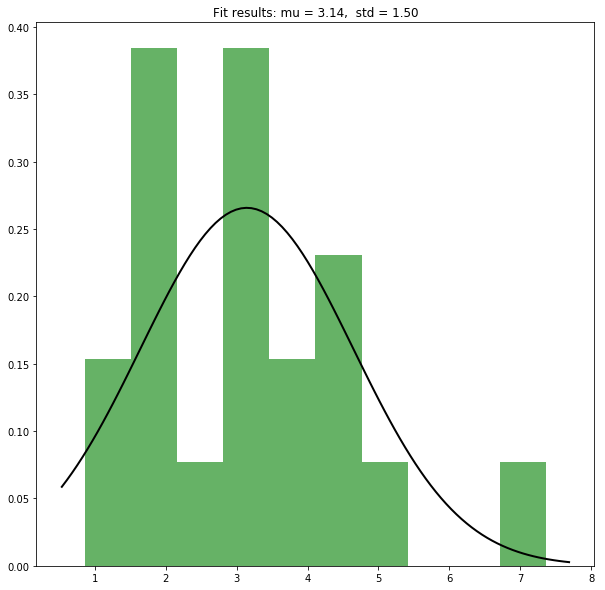

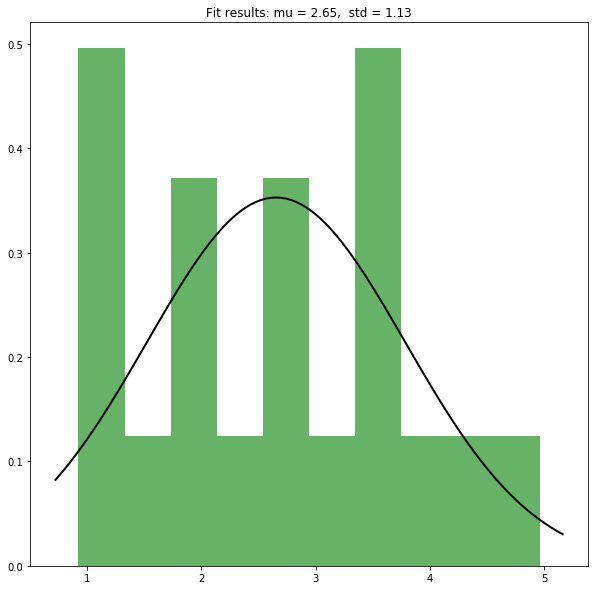

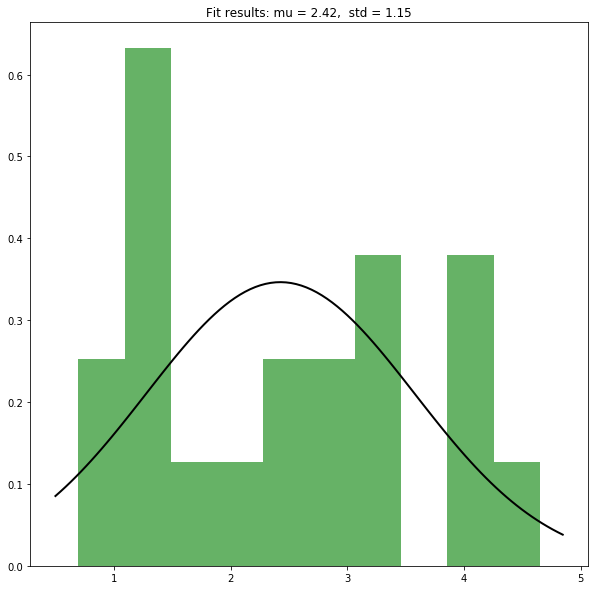

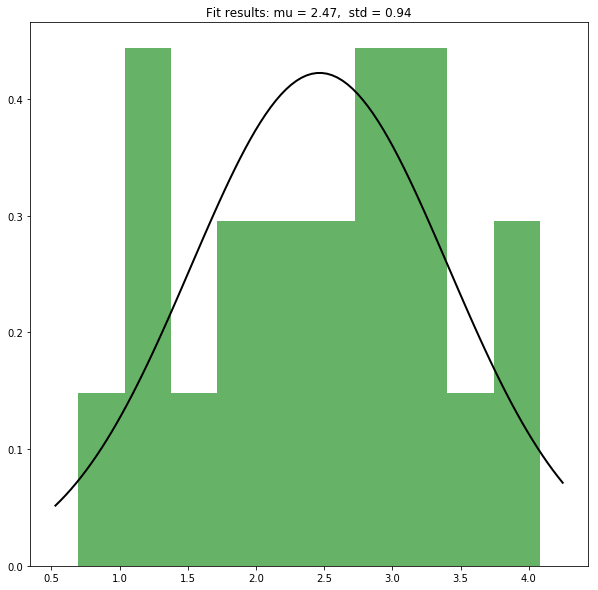

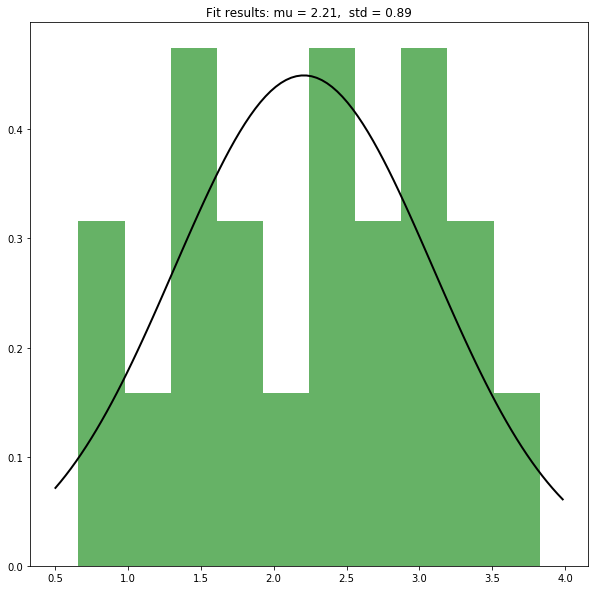

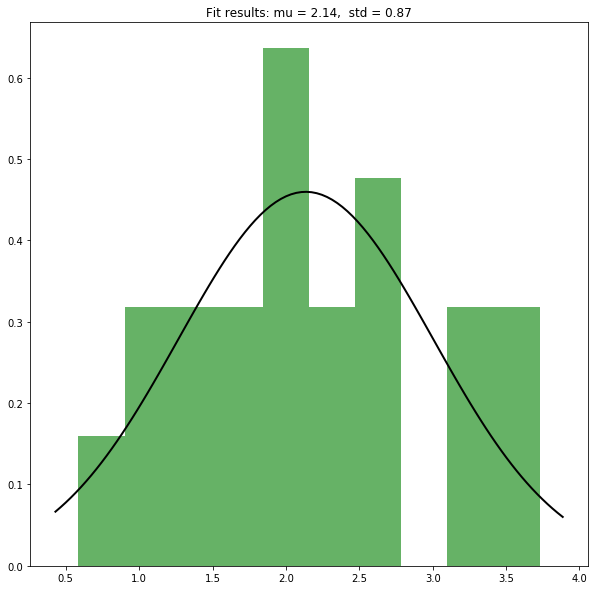

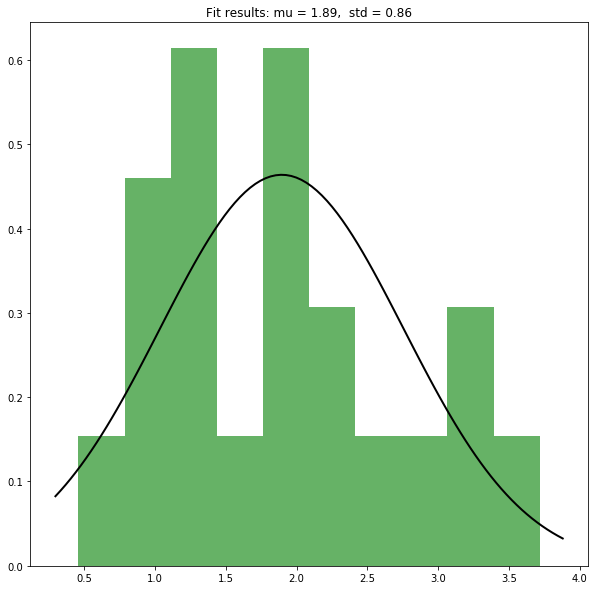

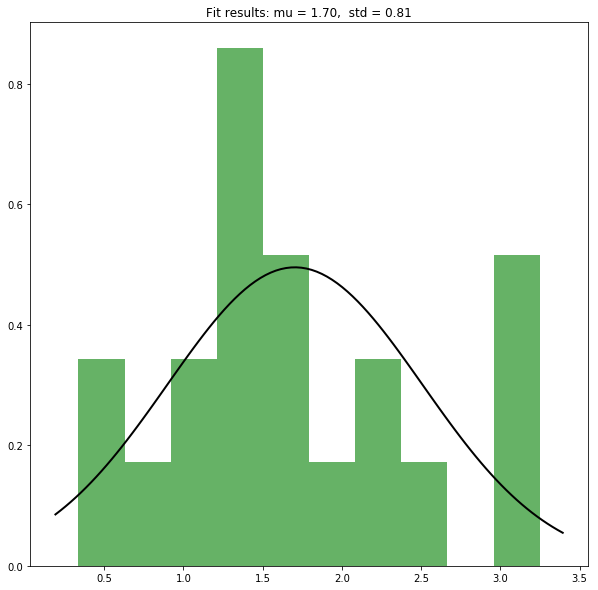

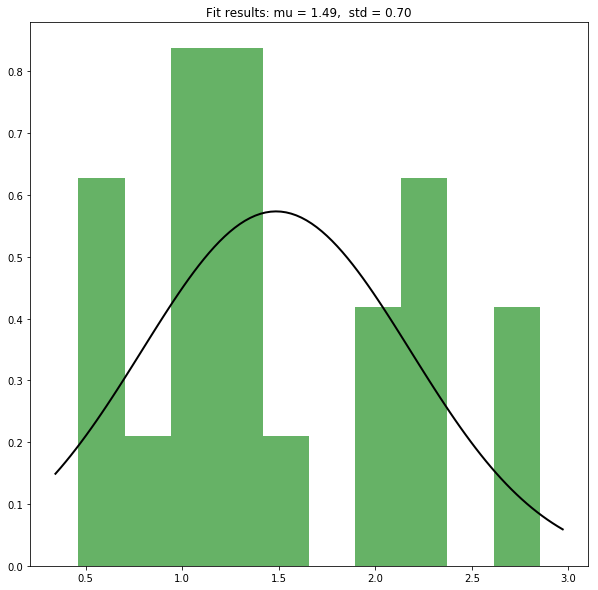

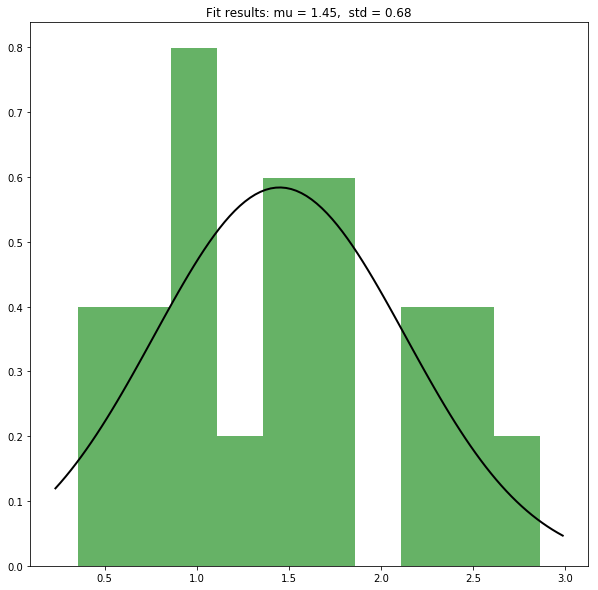

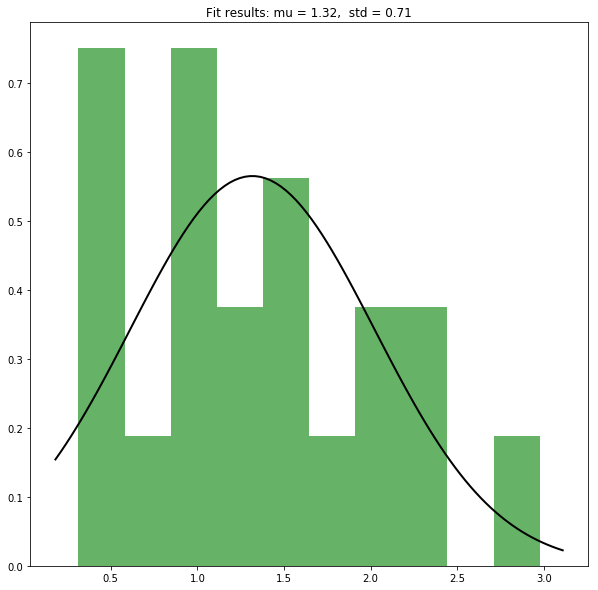

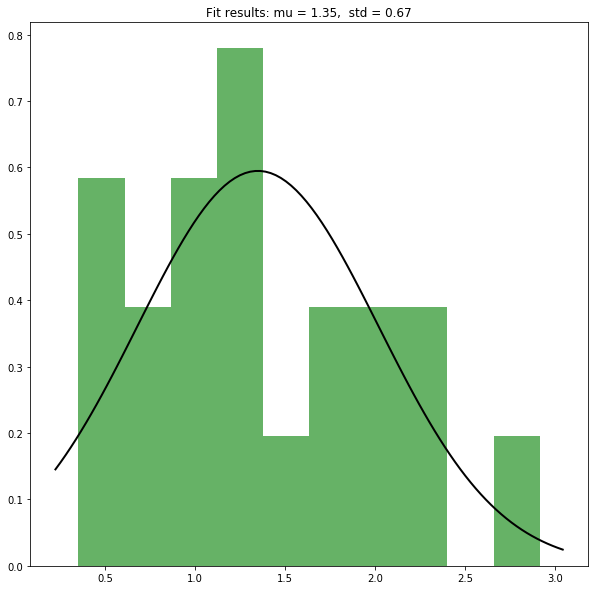

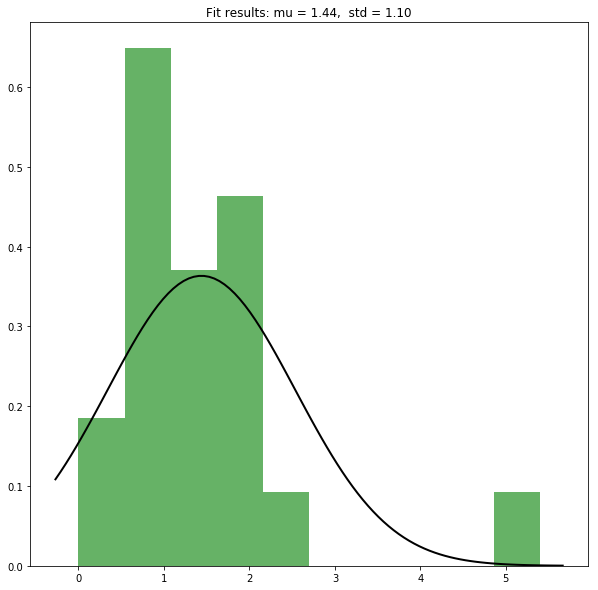

[[3.032153   1.28773597]
 [2.816194   1.3793072 ]
 [3.1767535  1.51440344]
 [3.3673055  1.84182927]
 [3.6075915  2.01514026]
 [3.628955   2.04558536]
 [3.410901   1.98371934]
 [3.14384685 1.50150867]
 [2.65409375 1.13027075]
 [2.42484305 1.15142864]
 [2.4667295  0.9443664 ]
 [2.2072152  0.88787766]
 [2.1354161  0.86755555]
 [1.89468605 0.86010951]
 [1.7033674  0.80560073]
 [1.48636535 0.69588537]
 [1.4505628  0.68344539]
 [1.31760645 0.70552885]
 [1.3485887  0.67063754]
 [1.43819145 1.09795524]]
[[0.   0.25 0.3  0.15 0.25 0.05 0.   0.   0.   0.  ]
 [0.   0.45 0.2  0.1  0.15 0.1  0.   0.   0.   0.  ]
 [0.   0.25 0.35 0.15 0.05 0.15 0.05 0.   0.   0.  ]
 [0.   0.25 0.3  0.15 0.1  0.1  0.05 0.   0.05 0.  ]
 [0.   0.25 0.15 0.25 0.15 0.1  0.05 0.   0.   0.05]
 [0.   0.2  0.2  0.3  0.15 0.05 0.05 0.   0.   0.  ]
 [0.   0.2  0.25 0.3  0.1  0.1  0.   0.   0.   0.  ]
 [0.05 0.25 0.1  0.35 0.2  0.   0.   0.05 0.   0.  ]
 [0.05 0.3  0.25 0.3  0.1  0.   0.   0.   0.   0.  ]
 [0.05 0.35 0.25 0.25 

In [37]:
plt.close()
from scipy.stats import norm
plt.close()
years2 = years[years != 2020]

year_dict = {}
histogram_list = []
le_histogram_list = []
week_data = national_data.loc[(national_data['YEAR'] <= 2019) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()

for week in weeks:
    week_i = week_data.loc[week_data['WEEK'] == week]
    weighted_ili = week_i['% WEIGHTED ILI'].tolist()
    
    bins = [0,1,2,3,4,5,6,7,8,9,10]
    le_histogram = np.histogram(weighted_ili, bins = bins)
    
    histogram = norm.fit(weighted_ili)   
    histogram_list.append(list(histogram))
    le_histogram_list.append(list(le_histogram[0]))
    
    ##################################################
    # Fit a normal distribution to the data:
    #mu, std = norm.fit(data)
    mu, std = histogram

    # Plot the histogram.
    plt.hist(weighted_ili, bins=10, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()
    ##################################################
    
le_histogram_list = np.asarray(le_histogram_list)    
histogram_list = np.asarray(histogram_list)

probabilities = []
for w in le_histogram_list:
    p = []
    for b in w:
        prb = b/20
        p.append(prb)
    probabilities.append(p)

probabilities = np.asarray(probabilities)


print(histogram_list)
print(probabilities)

### Probelm 3.3

In [24]:
import math
years3 = years[years == 2020]
week_data = national_data.loc[(national_data['YEAR'] == 2020) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()
print(week_data)

k = 1
for i in week_data['% WEIGHTED ILI']: 
    print('Observed ILI in Week ' + str(k) + ' is ' + str(round(i,5)) + ' with probability ' + str(round(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)),5)*100) + '%')
    #print(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)))
    k += 1
    
#print(histogram_list)

         REGION  YEAR  WEEK  % WEIGHTED ILI
11483  National  2020     1         5.90066
11494  National  2020     2         4.94020
11505  National  2020     3         5.33135
11516  National  2020     4         6.07822
11527  National  2020     5         6.74724
11538  National  2020     6         6.80157
11549  National  2020     7         6.11292
11560  National  2020     8         5.52513
11571  National  2020     9         5.12333
11582  National  2020    10         5.26652
11593  National  2020    11         5.66932
11604  National  2020    12         6.38029
11615  National  2020    13         4.91692
11626  National  2020    14         3.78625
11637  National  2020    15         2.80122
11648  National  2020    16         2.12907
11659  National  2020    17         1.73315
11670  National  2020    18         1.40939
11681  National  2020    19         1.18657
11692  National  2020    20         1.11444
Observed ILI in Week 1 is 5.90066 with probability 6.626%
Observed ILI in We

### Problem 3.4

In [27]:
print(bound_list)
print(histogram_list)

[7.1827376234725, 6.591847177059923, 6.6074082340118085, 6.9347602949651375, 7.571004688338628, 7.9133723587930875, 7.78158344245036, 6.831578428133637, 5.615105062174729, 5.179036909601333, 4.63893791418893, 4.0982150644912405, 3.574371161652545, 3.0713100599470775, 2.640645168672112, 2.3505130526571287, 2.6497992586342622, 2.3627367693671983, 2.085592256801177, 2.095619848737128]


In [25]:
bound_list = []
for m, s in histogram_list:
    bound_list.append(m + (3*s))

k=0
for i in week_data['% WEIGHTED ILI']: 
    if i > bound_list[k]:
        print('Week ' + str(k+1) + ' with weighted ILI of ' + str(round(i,5)) + ' is anomalous')
    k += 1
    
#These anomalous weeks alight with the second/third weeks of March 2020 through the middle/end of April.
#This makes sense, given this is around when COVID-19 case-coutns took off in the United States.

Week 10 with weighted ILI of 5.26652 is anomalous
Week 11 with weighted ILI of 5.66932 is anomalous
Week 12 with weighted ILI of 6.38029 is anomalous
Week 13 with weighted ILI of 4.91692 is anomalous
Week 14 with weighted ILI of 3.78625 is anomalous
Week 15 with weighted ILI of 2.80122 is anomalous


### Problem 3.5
###### See above, and in Overleaf

### Problem 3.6

##### Region 2

In [36]:
################
### REGION 2 ###
################
from scipy.stats import norm
plt.close()
years2 = years[years != 2020]

national_data = df.loc[df['REGION'] == 'Region 2']
years = df.YEAR.unique()

year_dict = {}
histogram_list = []
le_histogram_list = []
week_data = national_data.loc[(national_data['YEAR'] <= 2019) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()

for week in weeks:
    week_i = week_data.loc[week_data['WEEK'] == week]
    weighted_ili = week_i['% WEIGHTED ILI'].tolist()
    
    bins = [0,1,2,3,4,5,6,7,8,9,10]
    le_histogram = np.histogram(weighted_ili, bins = bins)
    
    histogram = norm.fit(weighted_ili)   
    histogram_list.append(list(histogram))
    le_histogram_list.append(list(le_histogram[0]))
    
le_histogram_list = np.asarray(le_histogram_list)    
histogram_list = np.asarray(histogram_list)

probabilities = []
for w in le_histogram_list:
    p = []
    for b in w:
        prb = b/20
        p.append(prb)
    probabilities.append(p)

probabilities = np.asarray(probabilities)

#######
years3 = years[years == 2020]
week_data = national_data.loc[(national_data['YEAR'] == 2020) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()
print(week_data)

k = 1
for i in week_data['% WEIGHTED ILI']: 
    #print('Observed ILI in Week ' + str(k) + ' is ' + str(round(i,5)) + ' with probability ' + str(round(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)),5)*100) + '%')
    #print(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)))
    k += 1
print(histogram_list)
bound_list = []
for m, s in histogram_list:
    bound_list.append(m + (3*s))
print(bound_list)
k=0
for i in week_data['% WEIGHTED ILI']: 
    if i > bound_list[k]:
        print('Week ' + str(k+1) + ' with weighted ILI of ' + str(round(i,5)) + ' is anomalous')
    k += 1

         REGION  YEAR  WEEK  % WEIGHTED ILI
11474  Region 2  2020     1         6.80679
11485  Region 2  2020     2         6.21231
11496  Region 2  2020     3         6.82373
11507  Region 2  2020     4         7.61598
11518  Region 2  2020     5         7.84250
11529  Region 2  2020     6         7.87662
11540  Region 2  2020     7         6.81988
11551  Region 2  2020     8         5.84719
11562  Region 2  2020     9         5.02339
11573  Region 2  2020    10         5.54010
11584  Region 2  2020    11         7.58419
11595  Region 2  2020    12        11.18830
11606  Region 2  2020    13        11.92180
11617  Region 2  2020    14        10.52370
11628  Region 2  2020    15         7.82961
11639  Region 2  2020    16         5.21489
11650  Region 2  2020    17         3.50180
11661  Region 2  2020    18         2.54026
11672  Region 2  2020    19         1.89918
11683  Region 2  2020    20         1.74327
[[3.032153   1.28773597]
 [2.816194   1.3793072 ]
 [3.1767535  1.51440344]
 

##### Region 4

In [35]:
################
### REGION 4 ###
################
from scipy.stats import norm
plt.close()
years2 = years[years != 2020]

national_data = df.loc[df['REGION'] == 'Region 4']
years = df.YEAR.unique()

year_dict = {}
histogram_list = []
le_histogram_list = []
week_data = national_data.loc[(national_data['YEAR'] <= 2019) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()

for week in weeks:
    week_i = week_data.loc[week_data['WEEK'] == week]
    weighted_ili = week_i['% WEIGHTED ILI'].tolist()
    
    bins = [0,1,2,3,4,5,6,7,8,9,10]
    le_histogram = np.histogram(weighted_ili, bins = bins)
    
    histogram = norm.fit(weighted_ili)   
    histogram_list.append(list(histogram))
    le_histogram_list.append(list(le_histogram[0]))
    
le_histogram_list = np.asarray(le_histogram_list)    
histogram_list = np.asarray(histogram_list)

probabilities = []
for w in le_histogram_list:
    p = []
    for b in w:
        prb = b/20
        p.append(prb)
    probabilities.append(p)

probabilities = np.asarray(probabilities)

#######
years3 = years[years == 2020]
week_data = national_data.loc[(national_data['YEAR'] == 2020) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()
print(week_data)

k = 1
for i in week_data['% WEIGHTED ILI']: 
    #print('Observed ILI in Week ' + str(k) + ' is ' + str(round(i,5)) + ' with probability ' + str(round(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)),5)*100) + '%')
    #print(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)))
    k += 1
print(histogram_list)
bound_list = []
for m, s in histogram_list:
    bound_list.append(m + (3*s))
print(np.asarray(bound_list))
k=0
for i in week_data['% WEIGHTED ILI']: 
    if i > bound_list[k]:
        print('Week ' + str(k+1) + ' with weighted ILI of ' + str(round(i,5)) + ' is anomalous')
    k += 1

         REGION  YEAR  WEEK  % WEIGHTED ILI
11476  Region 4  2020     1        6.820220
11487  Region 4  2020     2        5.200890
11498  Region 4  2020     3        5.420130
11509  Region 4  2020     4        6.449470
11520  Region 4  2020     5        7.461010
11531  Region 4  2020     6        7.300360
11542  Region 4  2020     7        6.321930
11553  Region 4  2020     8        5.353420
11564  Region 4  2020     9        4.809790
11575  Region 4  2020    10        5.394080
11586  Region 4  2020    11        5.810210
11597  Region 4  2020    12        5.935940
11608  Region 4  2020    13        4.268060
11619  Region 4  2020    14        3.055970
11630  Region 4  2020    15        2.043080
11641  Region 4  2020    16        1.653860
11652  Region 4  2020    17        1.255880
11663  Region 4  2020    18        0.999752
11674  Region 4  2020    19        0.863968
11685  Region 4  2020    20        0.846097
[[2.6279405  1.27759419]
 [2.438193   1.33660627]
 [2.754865   1.54636213]
 

##### Region 9

In [44]:
week_data
weeks
week_i
#weighted_ili

,REGION,YEAR,WEEK,% WEIGHTED ILI
217,Region 9,2000,20,0.946002
789,Region 9,2001,20,0.588438
1361,Region 9,2002,20,1.856810
1933,Region 9,2003,20,0.901108
2516,Region 9,2004,20,0.629095
3088,Region 9,2005,20,2.655360
3660,Region 9,2006,20,0.960785
4232,Region 9,2007,20,1.101400
4804,Region 9,2008,20,0.807717
5387,Region 9,2009,20,1.808890


In [39]:
################
### REGION 9 ###
################
from scipy.stats import norm
plt.close()
years2 = years[years != 2020]

national_data = df.loc[df['REGION'] == 'Region 9']
years = df.YEAR.unique()

year_dict = {}
histogram_list = []
le_histogram_list = []
week_data = national_data.loc[(national_data['YEAR'] <= 2019) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()

for week in weeks:
    week_i = week_data.loc[week_data['WEEK'] == week]
    weighted_ili = week_i['% WEIGHTED ILI'].tolist()
    
    bins = [0,1,2,3,4,5,6,7,8,9,10]
    le_histogram = np.histogram(weighted_ili, bins = bins)
    
    histogram = norm.fit(weighted_ili)   
    histogram_list.append(list(histogram))
    le_histogram_list.append(list(le_histogram[0]))
    
le_histogram_list = np.asarray(le_histogram_list)    
histogram_list = np.asarray(histogram_list)

probabilities = []
for w in le_histogram_list:
    p = []
    for b in w:
        prb = b/20
        p.append(prb)
    probabilities.append(p)

probabilities = np.asarray(probabilities)

#######
years3 = years[years == 2020]
week_data = national_data.loc[(national_data['YEAR'] == 2020) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()
print(week_data)

k = 1
for i in week_data['% WEIGHTED ILI']: 
    #print('Observed ILI in Week ' + str(k) + ' is ' + str(round(i,5)) + ' with probability ' + str(round(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)),5)*100) + '%')
    #print(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)))
    k += 1
print(histogram_list)
bound_list = []
for m, s in histogram_list:
    bound_list.append(m + (3*s))
print(np.asarray(bound_list))

k=0
for i in week_data['% WEIGHTED ILI']: 
    if i > bound_list[k]:
        print('Week ' + str(k+1) + ' with weighted ILI of ' + str(round(i,5)) + ' is anomalous')
    k += 1

         REGION  YEAR  WEEK  % WEIGHTED ILI
11481  Region 9  2020     1         4.57652
11492  Region 9  2020     2         3.81505
11503  Region 9  2020     3         4.10778
11514  Region 9  2020     4         4.66256
11525  Region 9  2020     5         4.69342
11536  Region 9  2020     6         4.74509
11547  Region 9  2020     7         4.41607
11558  Region 9  2020     8         4.29059
11569  Region 9  2020     9         3.90995
11580  Region 9  2020    10         3.63065
11591  Region 9  2020    11         3.92543
11602  Region 9  2020    12         4.48954
11613  Region 9  2020    13         3.41735
11624  Region 9  2020    14         2.52985
11635  Region 9  2020    15         1.95384
11646  Region 9  2020    16         1.57330
11657  Region 9  2020    17         1.30800
11668  Region 9  2020    18         1.20968
11679  Region 9  2020    19         1.07033
11690  Region 9  2020    20         1.09102
[[3.897862   1.72551277]
 [3.548912   1.49234134]
 [3.5087925  1.15137918]
 

##### Region 10

In [38]:
#################
### REGION 10 ###
#################
from scipy.stats import norm
plt.close()
years2 = years[years != 2020]

national_data = df.loc[df['REGION'] == 'Region 10']
years = df.YEAR.unique()

year_dict = {}
histogram_list = []
le_histogram_list = []
week_data = national_data.loc[(national_data['YEAR'] <= 2019) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()

for week in weeks:
    week_i = week_data.loc[week_data['WEEK'] == week]
    weighted_ili = week_i['% WEIGHTED ILI'].tolist()
    
    bins = [0,1,2,3,4,5,6,7,8,9,10]
    le_histogram = np.histogram(weighted_ili, bins = bins)
    
    histogram = norm.fit(weighted_ili)   
    histogram_list.append(list(histogram))
    le_histogram_list.append(list(le_histogram[0]))
    
le_histogram_list = np.asarray(le_histogram_list)    
histogram_list = np.asarray(histogram_list)

probabilities = []
for w in le_histogram_list:
    p = []
    for b in w:
        prb = b/20
        p.append(prb)
    probabilities.append(p)

probabilities = np.asarray(probabilities)

#######
years3 = years[years == 2020]
week_data = national_data.loc[(national_data['YEAR'] == 2020) & (national_data['WEEK']<= 20)]

weeks = week_data.WEEK.unique()
print(week_data)

k = 1
for i in week_data['% WEIGHTED ILI']: 
    #print('Observed ILI in Week ' + str(k) + ' is ' + str(round(i,5)) + ' with probability ' + str(round(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)),5)*100) + '%')
    #print(norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.ceil(i)) - norm(histogram_list[k-1][0], histogram_list[k-1][1]).cdf(math.floor(i)))
    k += 1
print(histogram_list)
bound_list = []
for m, s in histogram_list:
    bound_list.append(m + (3*s))
print(bound_list)
k=0
for i in week_data['% WEIGHTED ILI']: 
    if i > bound_list[k]:
        print('Week ' + str(k+1) + ' with weighted ILI of ' + str(round(i,5)) + ' is anomalous')
    k += 1

          REGION  YEAR  WEEK  % WEIGHTED ILI
11482  Region 10  2020     1         5.70858
11493  Region 10  2020     2         4.09724
11504  Region 10  2020     3         3.58253
11515  Region 10  2020     4         3.81960
11526  Region 10  2020     5         3.89226
11537  Region 10  2020     6         3.51263
11548  Region 10  2020     7         3.44896
11559  Region 10  2020     8         3.59175
11570  Region 10  2020     9         3.85846
11581  Region 10  2020    10         5.45059
11592  Region 10  2020    11         5.70073
11603  Region 10  2020    12         5.85685
11614  Region 10  2020    13         4.30568
11625  Region 10  2020    14         3.09564
11636  Region 10  2020    15         2.09284
11647  Region 10  2020    16         1.68601
11658  Region 10  2020    17         1.61005
11669  Region 10  2020    18         1.14218
11680  Region 10  2020    19         1.11946
11691  Region 10  2020    20         1.04433
[[2.48924055 1.41048583]
 [2.43936785 1.50823797]
 [2.6